In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

dataurl = "https://raw.githubusercontent.com/kerleeyon/NTUC_C27/main/loan.csv"  
data = pd.read_csv(dataurl)      
df = pd.DataFrame(data)

In [49]:
df.shape

(5000, 17)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [50]:
df.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [51]:
data.isnull().sum()

customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64

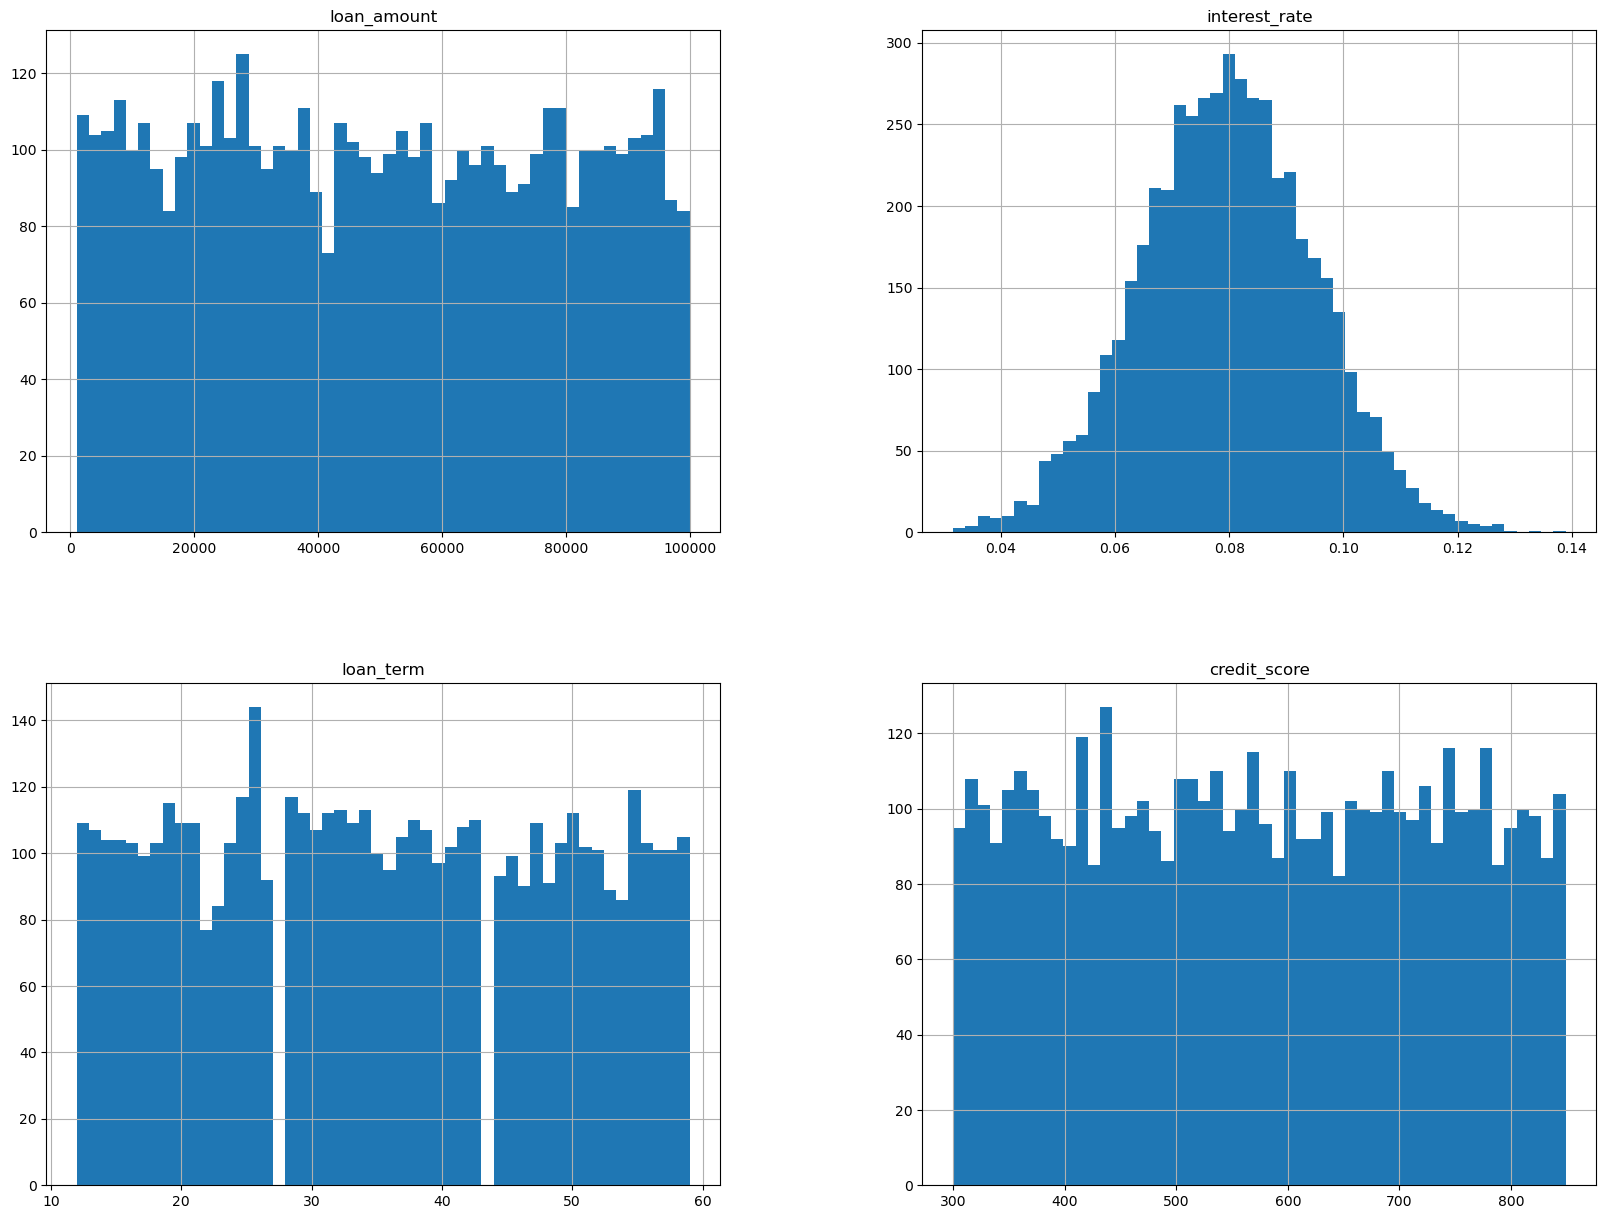

In [4]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

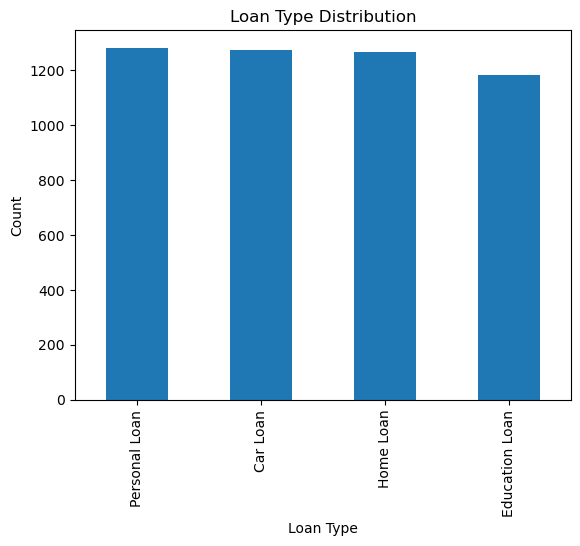

In [5]:
df['loan_type'].value_counts().plot(kind='bar')
plt.title('Loan Type Distribution')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()


In [6]:
df_num = df.select_dtypes(include=['number'])
df_num.nunique()

loan_amount      4880
interest_rate    4999
loan_term          48
credit_score      550
dtype: int64

In [7]:
df_cat = df.select_dtypes(include=['object'])
df_cat.nunique()

customer_id          3121
loan_id              3159
loan_type               4
employment_type         3
income_level            3
gender                  2
marital_status          3
education_level         4
application_date     1711
approval_date        1732
disbursement_date    1723
due_date             1764
dtype: int64

In [8]:
df.corr(numeric_only='True')

,loan_amount,interest_rate,loan_term,credit_score,default_status
loan_amount,1.000000,-0.017317,0.004763,-0.004780,-0.007309
interest_rate,-0.017317,1.000000,-0.014311,0.016064,0.028963
loan_term,0.004763,-0.014311,1.000000,-0.023735,-0.012358
credit_score,-0.004780,0.016064,-0.023735,1.000000,-0.007346
default_status,-0.007309,0.028963,-0.012358,-0.007346,1.000000


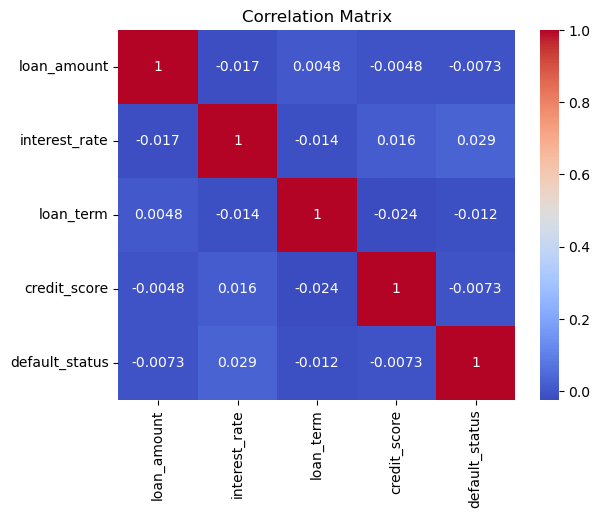

In [9]:
corr_matrix = df.corr(numeric_only='True')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


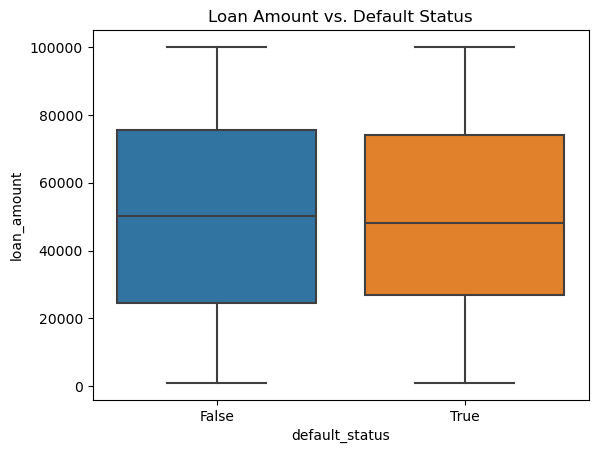

In [30]:
sns.boxplot(x='default_status', y='loan_amount', data=data)
plt.title('Loan Amount vs. Default Status')
plt.show()


In [31]:
data.groupby('default_status')['loan_amount'].mean()
#For the group where 'default_status' is False, the mean loan amount is approximately $50,034.75.
#For the group where 'default_status' is True, the mean loan amount is approximately $49,509.82.

default_status
False    50034.748313
True     49509.821822
Name: loan_amount, dtype: float64

In [32]:
data.groupby('default_status')['interest_rate'].mean()
#The proportion of loans with a default_status of False is approximately 7.94%
#The proportion of loans with a default_status of True is approximately 8.05%

default_status
False    0.079359
True     0.080462
Name: interest_rate, dtype: float64

In [33]:
data.groupby('employment_type')['default_status'].mean()
#For Full-time employees, the mean default status is approximately 18.63% (0.186257).
#For Part-time employees, the mean default status is approximately 20.33% (0.203349).
#For Self-employed individuals, the mean default status is approximately 20.97% (0.209706).

employment_type
Full-time        0.186257
Part-time        0.203349
Self-employed    0.209706
Name: default_status, dtype: float64

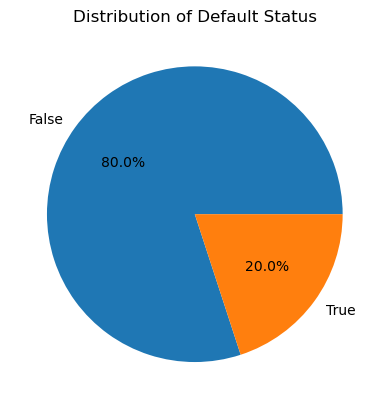

In [55]:
temp = df['default_status'].value_counts() 
plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%') 
plt.title("Distribution of Default Status")
plt.show() 


In [12]:
df.loc[df.loan_amount>= 50000, 'default_status'].value_counts()

default_status
False    2004
True      479
Name: count, dtype: int64

In [13]:
df.loc[df.loan_amount<= 25000, 'default_status'].value_counts()

default_status
False    1024
True      231
Name: count, dtype: int64

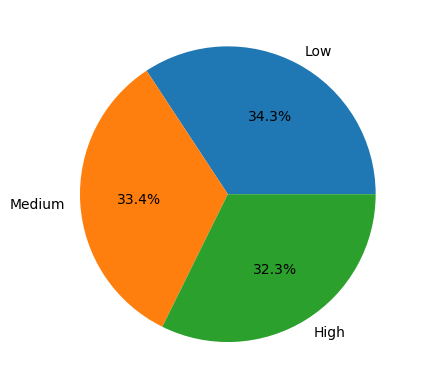

In [3]:
temp = df['income_level'].value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 


In [17]:
aa = len(df.query("interest_rate <=0.05 and default_status ==True"))
bb = len(df.query("interest_rate <=0.05 and default_status ==False"))
cc = len(df.query("interest_rate >=0.05 and default_status ==False"))
dd = len(df.query("interest_rate >=0.05 and default_status ==True"))

print('Interest Rate <=0.05 and Default: ', aa)
print('Interest Rate <=0.05 and Not Default: ', bb)
print('Interest Rate >=0.05 and Not Default: ', cc)
print('Interest Rate >=0.05 and Default: ', dd)

Interest Rate <=0.05 and Default:  28
Interest Rate <=0.05 and Not Default:  110
Interest Rate >=0.05 and Not Default:  3891
Interest Rate >=0.05 and Default:  971


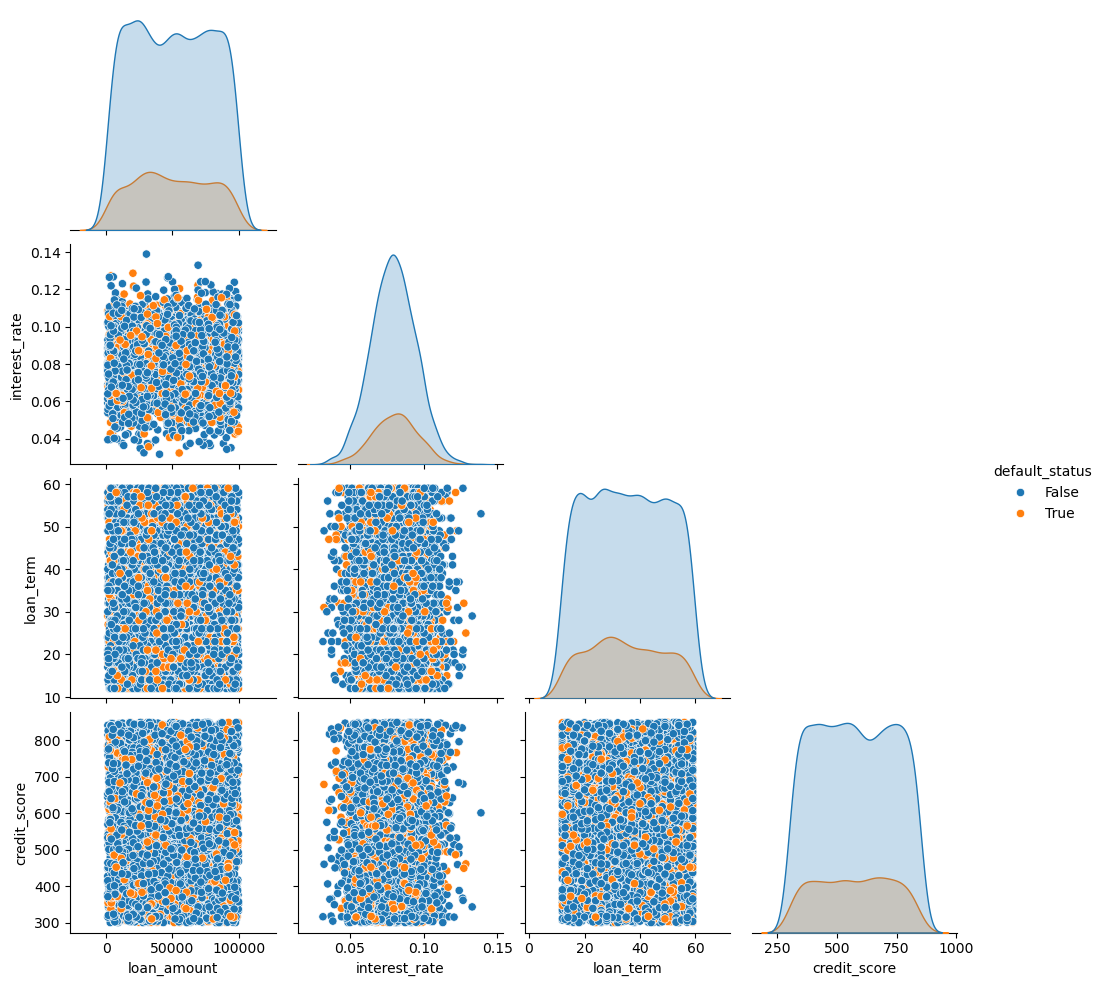

In [11]:
# Pairplot analysis
_ = sns.pairplot(df, corner=True, hue='default_status')

In [18]:
df = df.drop(["customer_id","loan_id","application_date","approval_date","disbursement_date","due_date"],axis = 1)

In [21]:
df

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False
3,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False
4,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,Car Loan,37945,0.070087,57,Self-employed,High,511,Male,Married,PhD,False
4996,Personal Loan,48937,0.056405,50,Part-time,Medium,502,Male,Single,PhD,False
4997,Home Loan,7476,0.064212,58,Full-time,High,452,Female,Single,High School,True
4998,Car Loan,52756,0.094914,12,Self-employed,Medium,728,Male,Married,PhD,False


<Axes: xlabel='income_level', ylabel='count'>

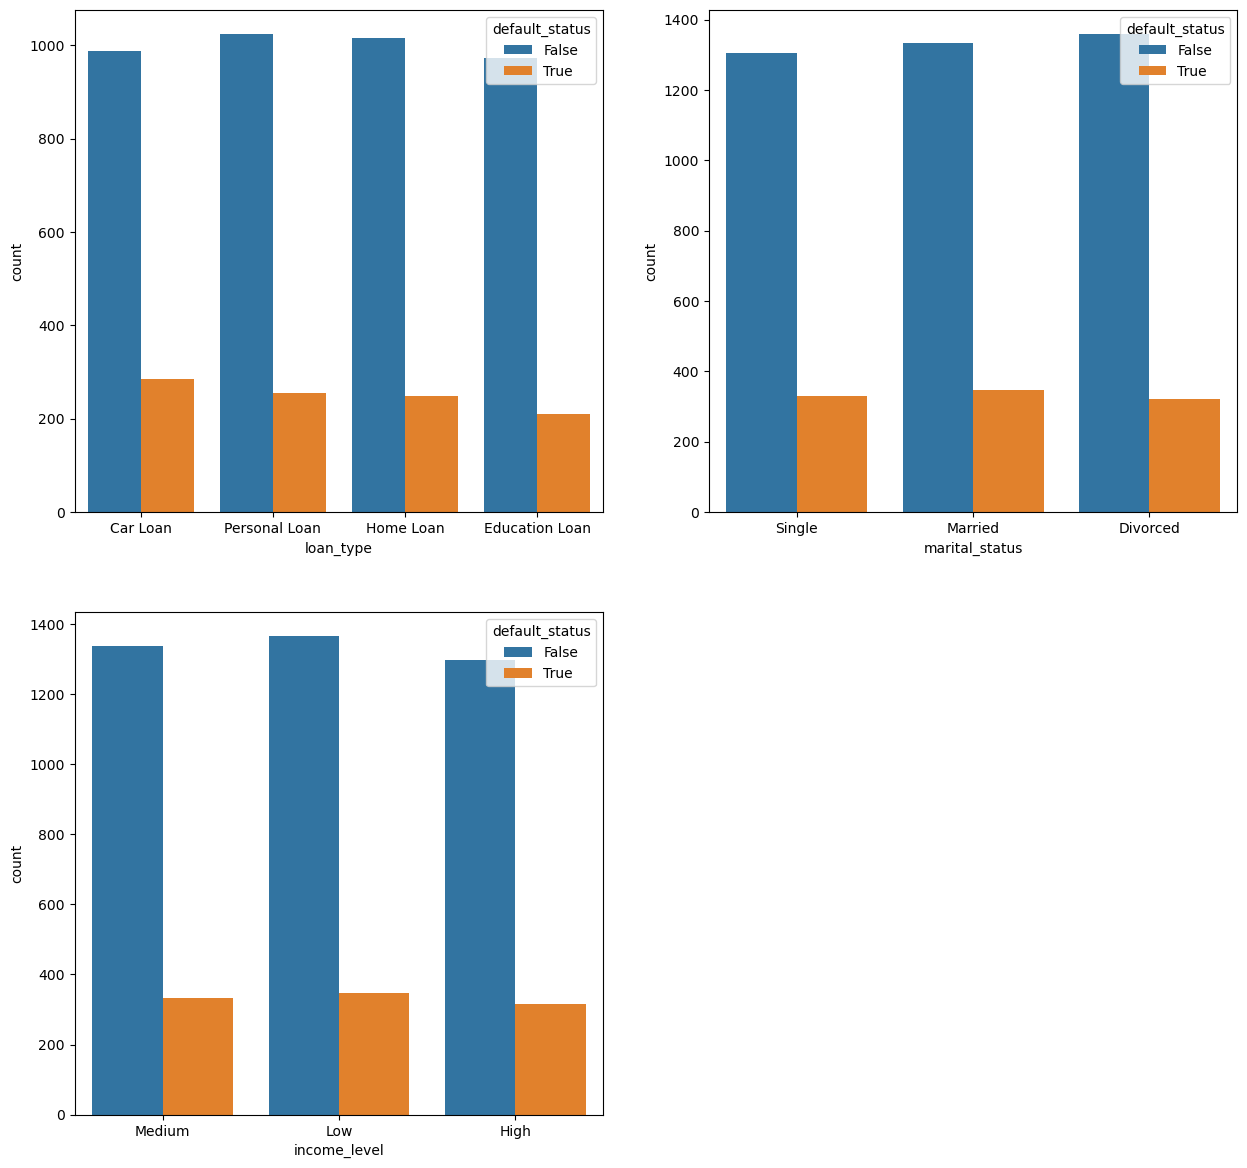

In [56]:
plt.figure(figsize=(15, 30))

plt.subplot(4, 2, 1)
sns.countplot(x='loan_type', data=df, hue='default_status')

plt.subplot(4, 2, 2)
sns.countplot(x='marital_status', data=df, hue='default_status')

plt.subplot(4, 2, 3)
sns.countplot(x='income_level', data=df, hue='default_status')

In [26]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(df,drop_first=True)
train_df_encoded.head()

,loan_amount,interest_rate,loan_term,credit_score,default_status,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Part-time,employment_type_Self-employed,income_level_Low,income_level_Medium,gender_Male,marital_status_Married,marital_status_Single,education_level_High School,education_level_Master,education_level_PhD
0,16795,0.051852,15,833,False,False,False,False,False,True,False,True,True,False,True,False,True,False
1,1860,0.089296,56,776,False,False,False,True,False,False,False,True,False,True,False,False,False,False
2,77820,0.070470,51,697,False,False,False,True,False,False,True,False,True,False,False,True,False,False
3,55886,0.062155,30,795,False,False,False,False,False,False,True,False,False,True,False,False,False,True
4,7265,0.070635,48,519,False,False,True,False,True,False,True,False,False,True,False,True,False,False


In [58]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='default_status')
y = train_df_encoded['default_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [42]:
# Import the Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
#SEED = 42
#np.random.seed(SEED)

clf = DecisionTreeClassifier(random_state=0)

In [43]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})
compare_df[:5]

,Desired Output (Actuals),Predicted Output
4345,False,False
1563,False,False
3228,False,True
1341,False,False
4857,False,True


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred))
print()

Classification report:

              precision    recall  f1-score   support

       False       0.82      0.79      0.80       800
        True       0.26      0.28      0.27       200

    accuracy                           0.69      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.70      0.69      0.70      1000




In [36]:
# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[635, 165],
       [143,  57]], dtype=int64)

In [37]:
# List out the first ten or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:10]

,Desired Output (Actuals),Predicted Output
3228,False,True
4857,False,True
3005,False,True
349,False,True
3027,True,False
3230,True,False
3363,False,True
4402,True,False
2970,True,False
197,False,True


In [61]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.3f}')

Logistic Regression: Accuracy = 0.800
KNN: Accuracy = 0.760
Decision Tree: Accuracy = 0.697
Random Forest: Accuracy = 0.799
SVM: Accuracy = 0.800
